In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Load MNIST data

In [41]:
# LOAD MNIST DATA
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<class 'numpy.ndarray'>


In [42]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

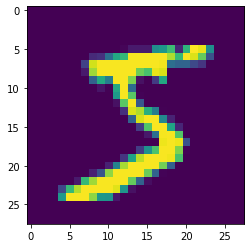

tf.Tensor(5, shape=(), dtype=uint8)


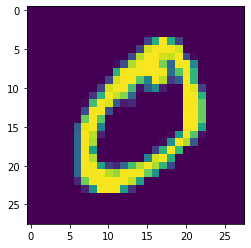

tf.Tensor(0, shape=(), dtype=uint8)


In [45]:
batched_dataset = train_dataset.batch(2)

for batch in [batch for batch in batched_dataset][0:1]: 
    x_s, labels = batch
    for x, label in zip(x_s, labels):
        plt.imshow(x)
        plt.show()
        print(label)

# Random dataset + batching + shuffling

In [12]:
# CREATE RANDOM DATASET
num_pairs = 10
features, labels = (np.random.sample((num_pairs,2)), np.random.sample((num_pairs,1)))
dataset = tf.data.Dataset.from_tensor_slices((features,labels))

In [13]:
print(labels[0])

[0.3911827]


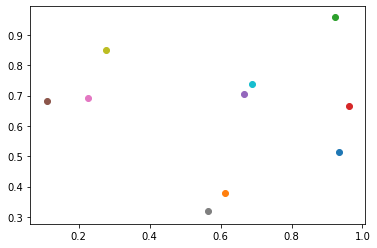

In [14]:
# PRINT RANDOM DATASET
for pt, label in dataset:    #dataset is iterable
    plt.scatter(pt[0], pt[1])
plt.show()

In [24]:
# BATCHING 
batch_size = 3
batches = dataset.batch(batch_size)   # batching divides dataset into batches of size 'batch_size'

for batch in batches:
    print('new batch')
    pts, labels = batch
    for pt, label in zip(pts, labels):
        print("pt:", pt)
        print("label:", label)
        

new batch
pt: tf.Tensor([0.93261654 0.51375976], shape=(2,), dtype=float64)
label: tf.Tensor([0.3911827], shape=(1,), dtype=float64)
pt: tf.Tensor([0.61124198 0.37932037], shape=(2,), dtype=float64)
label: tf.Tensor([0.84811384], shape=(1,), dtype=float64)
pt: tf.Tensor([0.92163117 0.95908287], shape=(2,), dtype=float64)
label: tf.Tensor([0.0163716], shape=(1,), dtype=float64)
new batch
pt: tf.Tensor([0.96064504 0.66471326], shape=(2,), dtype=float64)
label: tf.Tensor([0.37397896], shape=(1,), dtype=float64)
pt: tf.Tensor([0.66742226 0.70383535], shape=(2,), dtype=float64)
label: tf.Tensor([0.57961524], shape=(1,), dtype=float64)
pt: tf.Tensor([0.10955625 0.6822207 ], shape=(2,), dtype=float64)
label: tf.Tensor([0.76712898], shape=(1,), dtype=float64)
new batch
pt: tf.Tensor([0.22571596 0.69157302], shape=(2,), dtype=float64)
label: tf.Tensor([0.43427402], shape=(1,), dtype=float64)
pt: tf.Tensor([0.56494539 0.31857399], shape=(2,), dtype=float64)
label: tf.Tensor([0.48667392], shape=(

In [40]:
# SHUFFLING

dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4])
buffer_size = 1
dataset = dataset.shuffle(buffer_size)
# buffer is initialized. random element is pulled from buffer. next value outside buffer imputed.
# another random buffer element pulled. process repeats. the larger the buffer, the more random shuffle is.

for elem in dataset:
    print(elem)

print('---------------------')
dataset = dataset.shuffle(2)

for elem in dataset:
    print(elem)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
---------------------
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


# Train model on random dataset

In [ ]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
    def on_train_batch_begin(self, batch, logs={}):
        pass
    def on_train_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('accuracy'))

# Define simple classification network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 2)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
  tf.keras.layers.Dense(1)
])

# Define classification loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


# Compile model + optimizer
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Classification training
history = LossHistory()
model.fit(x_train, y_train, epochs=5, callbacks=[history])

# Evaluate accuracy
model.evaluate(x_test,  y_test, verbose=2)

# Plot MNIST digits
image = x_train[16]
plt.imshow(image)
plt.show()

# Plotting loss and accuracy
losses = history.losses
plt.title("Loss vs Training Steps")
plt.xlabel("Training Step")
plt.ylabel('Loss')
plt.plot(losses)
acc_s = history.accuracies
plt.figure()
plt.title("Accuracy vs Training Steps")
plt.xlabel("Training Step")
plt.ylabel('Accuracy')
plt.plot(acc_s)
plt.show()

In [ ]:
def random_subset_selector(A, n):
    